In [62]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#데이터 불러오기
with open("../data/wikipedia_documents.json") as json_file:
    json_data = json.load(json_file)
    
df_wiki = pd.DataFrame(json_data)
df = df_wiki.transpose()

In [5]:
print('url:',df['url'].unique())
print('domain:',df['domain'].unique())
print('title_len:',len(df['title'].unique()))
print('author:',df['author'].unique())
print('html:',df['html'].unique())

url: ['TODO' None]
domain: [None]
title_len: 31755
author: [None]
html: [None]


In [6]:
#겹치는 데이터 개수 
all_duplicates = df[df.duplicated(subset=['text'], keep=False)]
print(len(all_duplicates))

7677


In [9]:
df_drop = df.drop(['domain','author','html','url','document_id','corpus_source'],axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60613 non-null  object
 1   title   60613 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [10]:
# url도 빼도 되지 않을까 ? -> 적용 0
null_cnt = df_drop.isnull().sum()
null_cnt 

text     0
title    0
dtype: int64

In [14]:
# 텍스트 길이를 계산하여 새로운 열로 추가 (apply() 사용)
df_drop['text_len'] = df_drop['text'].apply(len)

In [59]:
df_drop['text_len'].describe(percentiles=[.25, .5, .75]).round(2)

count    60613.00
mean       755.57
std        762.96
min        184.00
25%        414.00
50%        577.00
75%        857.00
max      46099.00
Name: text_len, dtype: float64

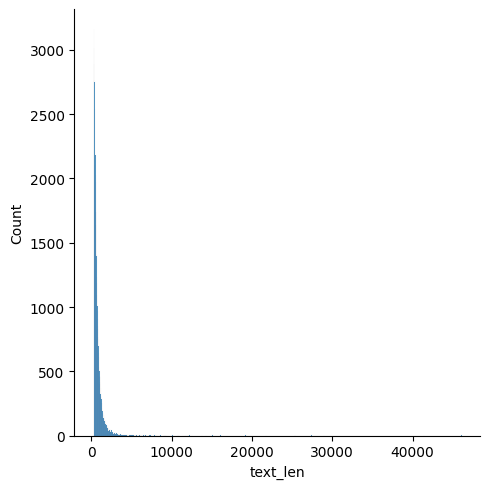

In [60]:
import seaborn as sns
sns.displot(data=df_drop, x='text_len')

In [70]:
# 한국어 + 숫자 + 특수기호
def korean_ratio(text):
    korean_number_special_count = len(re.findall(r"[가-힣0-9,\.\/'\n\"#\(\)\!\^\*\@\+\`\_\-\~\$\%\&\=\:\;\?\>\< ]", text))
    total_count = len(text)
    return korean_number_special_count / total_count

df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)
average_korean_ratio = df_drop['korean_ratio'].mean()
print('average_korean_ratio : ',average_korean_ratio)

average_korean_ratio :  0.9342801569051211
count    60613.000000
mean         0.934280
std          0.095816
min          0.019681
25%          0.918121
50%          0.967164
75%          0.990220
max          1.000000
Name: korean_ratio, dtype: float64


In [46]:
df_drop['korean_ratio'].describe()

count    60613.000000
mean         0.934280
std          0.095816
min          0.019681
25%          0.918121
50%          0.967164
75%          0.990220
max          1.000000
Name: korean_ratio, dtype: float64

In [26]:
# only 한국어

# def korean_ratio(text):
#     korean_number_special_count = len(re.findall(r"[가-힣]", text))
#     total_count = len(text)
#     return korean_number_special_count / total_count

# df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)
# average_korean_ratio = df_drop['korean_ratio'].mean()
# print('average_korean_ratio : ',average_korean_ratio)

#print(df_drop['korean_ratio'].describe())

average_korean_ratio :  0.6280879271430576


In [30]:
#특수문자 기호

# def korean_ratio(text):
#     pattern2 = r"[\.\/'\n\"#\(\)\!\^\*\@\+\`\_\-\~\$\%\&\=\:\;\?\>\< ]"
#     korean_number_special_count = len(re.findall(pattern2, text))
#     total_count = len(text)
#     return korean_number_special_count / total_count

# df_drop['korean_ratio'] = df_drop['text'].apply(korean_ratio)

# average_korean_ratio = df_drop['korean_ratio'].mean()
# print('average_korean_ratio : ',average_korean_ratio)

# print(df_drop['korean_ratio'].describe())

average_korean_ratio :  0.25354099488696563


In [58]:
korean_ratio = df_drop[df_drop['korean_ratio'] < 0.5]

# 데이터프레임을 CSV 파일로 저장
korean_ratio.to_csv('korean_ratio_0.5_down.csv', index=False, encoding='utf-8')

In [68]:
#train 데이터셋 정답답과 비교 

from datasets import load_from_disk
dataset = load_from_disk("../data/train_dataset/")

# 'train' 데이터셋에서 context를 시리즈로 가져오기
contexts = dataset['train']['context']

# korean_ratio가 0.5보다 작은 텍스트를 가져오기
korean_ratio_texts = df_drop[df_drop['korean_ratio'] < 0.5]['text']
#korean_ratio_texts = df_drop['text']
# 두 시리즈 간의 교집합 찾기
matching_texts = set(contexts).intersection(set(korean_ratio_texts))

# 결과 출력
if len(matching_texts) > 0:
    print(f"일치하는 텍스트가 {len(matching_texts)}개 있습니다.")
else:
    print("일치하는 텍스트가 없습니다.")


일치하는 텍스트가 없습니다.
